In [128]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

In [129]:
class PlotData:
    def __init__(self,x,y,color,label,alpha):
        self.x = x
        self.y = y
        self.color = color
        self.label = label
        self.alpha = alpha
class ScatterData:
    def __init__(self,x,y,color,label,marker,alpha):
        self.x = x
        self.y = y
        self.color = color
        self.label = label
        self.marker = marker
        self.alpha = alpha

In [132]:
 def PlotHelper(title, xLabel, yLabel, minX,maxX, plotData = None, scatterData = None):
    fig = plt.figure()
    ax= plt.axes()
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_aspect('equal', adjustable='box')
    
    xy = {}
    
    if plotData is not None:
        for data in plotData:
            ax.plot(data.x,data.y, label = data.label, color=data.color, alpha = data.alpha)
            if plotData.index(data) == len(plotData) - 1:
                xy = (np.average(data.x), np.max(data.y))
    
    if scatterData is not None:
        for data in scatterData:
            ax.scatter(data.x,data.y, label = data.label, color=data.color, alpha = data.alpha, marker =data.marker)

    plt.arrow(2.5,-4.25,0,3, head_width = 0.5)
    
    length = 5
    plt.arrow(0,0,-length,length, head_width = 0.5, color= "green")
    plt.arrow(5,0,length,length, head_width = 0.5, color= "green")
    plt.arrow(2.5,0,0,length, head_width = 0.5, color= "green")

    
    ax.annotate('Wavefront', xy=xy,  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
    
    plt.show()

[0.   1.25 2.5  3.75 5.  ]


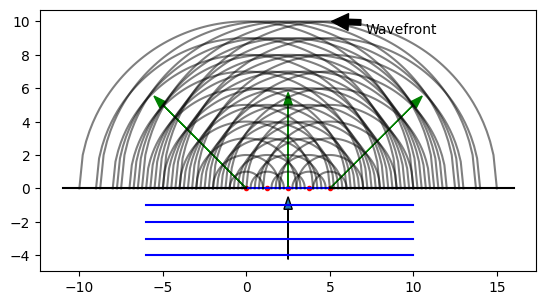

In [133]:
minX = 0
maxX = 5

domain = np.linspace(minX,maxX,5)
initial = -4
data = []
scatter = []

iterations = range(15)
maxRadius = initial + len(iterations)
initialWavefront = np.linspace(-maxRadius//2,maxRadius//2, 5) + domain

print(domain)
for i in iterations:
    if initial + i <= 0:
        data.append(PlotData(initialWavefront, initialWavefront * 0 + (initial + i),"blue",None,1.0))
    if initial + i == 0:
        scatter.append(ScatterData(domain, domain * 0 + initial + i, "red", "",".",1.0))
        data.append(PlotData(np.linspace(-maxRadius,0), np.linspace(-maxRadius,minX) * 0, "black", None,1.0))
        data.append(PlotData(np.linspace(5,maxRadius + 5), np.linspace(maxX,maxRadius) * 0, "black", None,1.0))
    if initial + i > 0:
        radius = initial + i
        for x in domain:
#             print(x)
            X = np.linspace(x - radius,x + radius, 100)
#             print(x,X)
            y = np.sqrt(radius ** 2 - (X - x)** 2)
            data.append(PlotData(X, y, "black", None,0.5))
    
PlotHelper("Diffraction", "", "", minX,maxX, data, scatter)